# Author: Morgan Reilly - G00303598

## References:

* https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/index.html?index=..%2F..index#0

* http://neuralnetworksanddeeplearning.com/chap1.html

* https://keras.io/

* https://www.ics.uci.edu/~mohamadt/keras_mnist.html


### Imports

In [3]:
import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils
from keras.regularizers import l2

from matplotlib import pyplot as plt
%matplotlib inline

print("Keras Version " + keras.__version__)

Keras Version 2.3.1


### Load and Prepare Data Set

* Loading the data set by calling the mnist.load_data() function.
* Storing the data into arrays for the test and train set, along with their labels.
* Using reshape() from NumPy to give a new shape to the array without losing any data.
* Casting arrays as type: float32
* One hot encoding transforms categorical labels to 0s and 1s in order for the model to interpret [https://www.youtube.com/watch?v=v_4KWmkwmsU]


In [4]:
# Loading data from training and test sets along with labels
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Print data
print("Original X Shape", X_train.shape)
print("Original Y Shape", Y_train.shape)

# Reshaping data
X_train = X_train.reshape(60000, 784) # Reshaping training data
X_test = X_test.reshape(10000, 784) # Reshaping test data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # Original data is uint8 (0-255). Scale to range [0,1]
X_test /= 255

print("Training X Matrix Shape", X_train.shape)
print("Training X Matrix Shape", X_test.shape)

# print (Y_train[0])

# Represent the targets as one-hot vectors i.e 3 --> [0,0,0,0,1,0,0,0,0]
nb_classes = 10

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

Original X Shape (60000, 28, 28)
Original Y Shape (60000,)
Training X Matrix Shape (60000, 784)
Training X Matrix Shape (10000, 784)
Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


### Viewing data

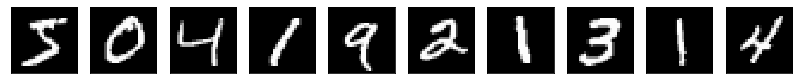

In [32]:
# Plot examples of the data.
plt.figure(1, figsize=(14,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

### Sequentail Keras Model

#### Notes:
Adding more layers to allow the network to go deeper.

Chaging 'sigmoid' to 'relu', reason being that even if the gradients coming from some neurons can be zero, there will always be others giving a clear non-zero gradient and training can continue at a good pace.

Changing 'sgd' to 'adam' --> Better optimizer

Adding dropout after each dense layer. Regularization technique.

In [29]:
model = Sequential()

model.add(Dense(200, activation='relu', input_shape=(784,), W_regularizer=l2(0.001)))
# model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(60, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_27 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                610       
Total params: 183,770
Trainable params: 183,770
Non-trainable params: 0
_________________________________________________________________


/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", input_shape=(784,), kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until


### Train the model

In [30]:
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1,
                    validation_data=(X_test, Y_test))

/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.4844 - accuracy: 0.9095 - val_loss: 0.3828 - val_accuracy: 0.9398
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3756 - accuracy: 0.9362 - val_loss: 0.3659 - val_accuracy: 0.9374
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3442 - accuracy: 0.9411 - val_loss: 0.3359 - val_accuracy: 0.9385
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3253 - accuracy: 0.9441 - val_loss: 0.3331 - val_accuracy: 0.9399
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3163 - accuracy: 0.9446 - val_loss: 0.3746 - val_accuracy: 0.9287
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3150 - accuracy: 0.9447 - val_loss: 0.3171 - val_accuracy: 0.9452
Epoch 7/10
60000/60000 [==============================] - 2s 40us/st

### Visualising predictions

KeyError: 'val_acc'

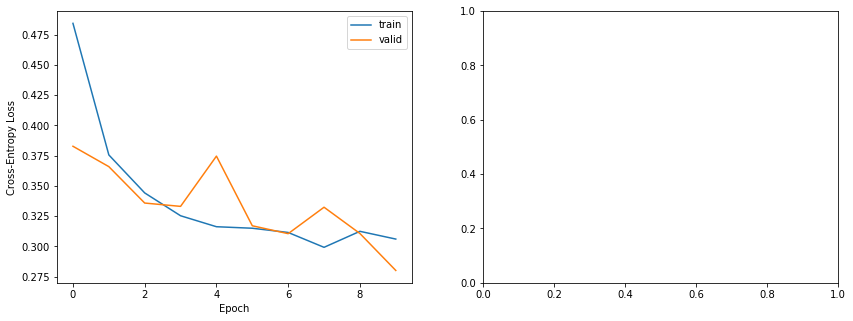

In [31]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()